In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Ścieżka do pliku Excel

In [76]:
file_path = r"C:\Users\szymo\Downloads\who_aap_2021_v9_11august2022.xlsx"

# Nazwa arkusza

In [77]:
sheet_name = "AAP_2022_city_v9"

# Wczytanie danych z pliku Excel do DataFrame

In [78]:
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Wyświetlenie pierwszych kilku wierszy wczytanych danych

In [79]:
print(df.head())

                     WHO Region ISO3 WHO Country Name City or Locality  \
0  Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1               European Region  ALB          Albania           Durres   
2               European Region  ALB          Albania           Durres   
3               European Region  ALB          Albania          Elbasan   
4               European Region  ALB          Albania          Elbasan   

   Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0              2019         119.77           NaN          NaN   
1              2015            NaN         17.65        26.63   
2              2016          14.32         24.56        24.78   
3              2015            NaN           NaN        23.96   
4              2016            NaN           NaN        26.26   

   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
0                        18.0                         NaN   
1                         NaN             

zliczenie i usunięcie danych dla lat w których było mało pomiarów

In [80]:
count_measurement_year = df['Measurement Year'].value_counts()

In [81]:
print(count_measurement_year)

Measurement Year
2018    5032
2019    4805
2016    4156
2017    3929
2015    3788
2014    3060
2010    2900
2013    2802
2012     847
2011     668
2020     165
2021      18
2000       3
2001       3
2002       3
2006       3
2007       3
2003       2
2004       2
2009       1
2008       1
Name: count, dtype: int64


In [82]:
mask =  ((df['Measurement Year'] <= 2010) | (df['Measurement Year'] == 2021))
df = df.drop(df[mask].index)

# Wybór wybranych kolumn do analizy

In [83]:
selected_columns = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
                        'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)','WHO Region']

In [84]:
# Wygenerowanie wykresu pairplot dla wybranych kolumn

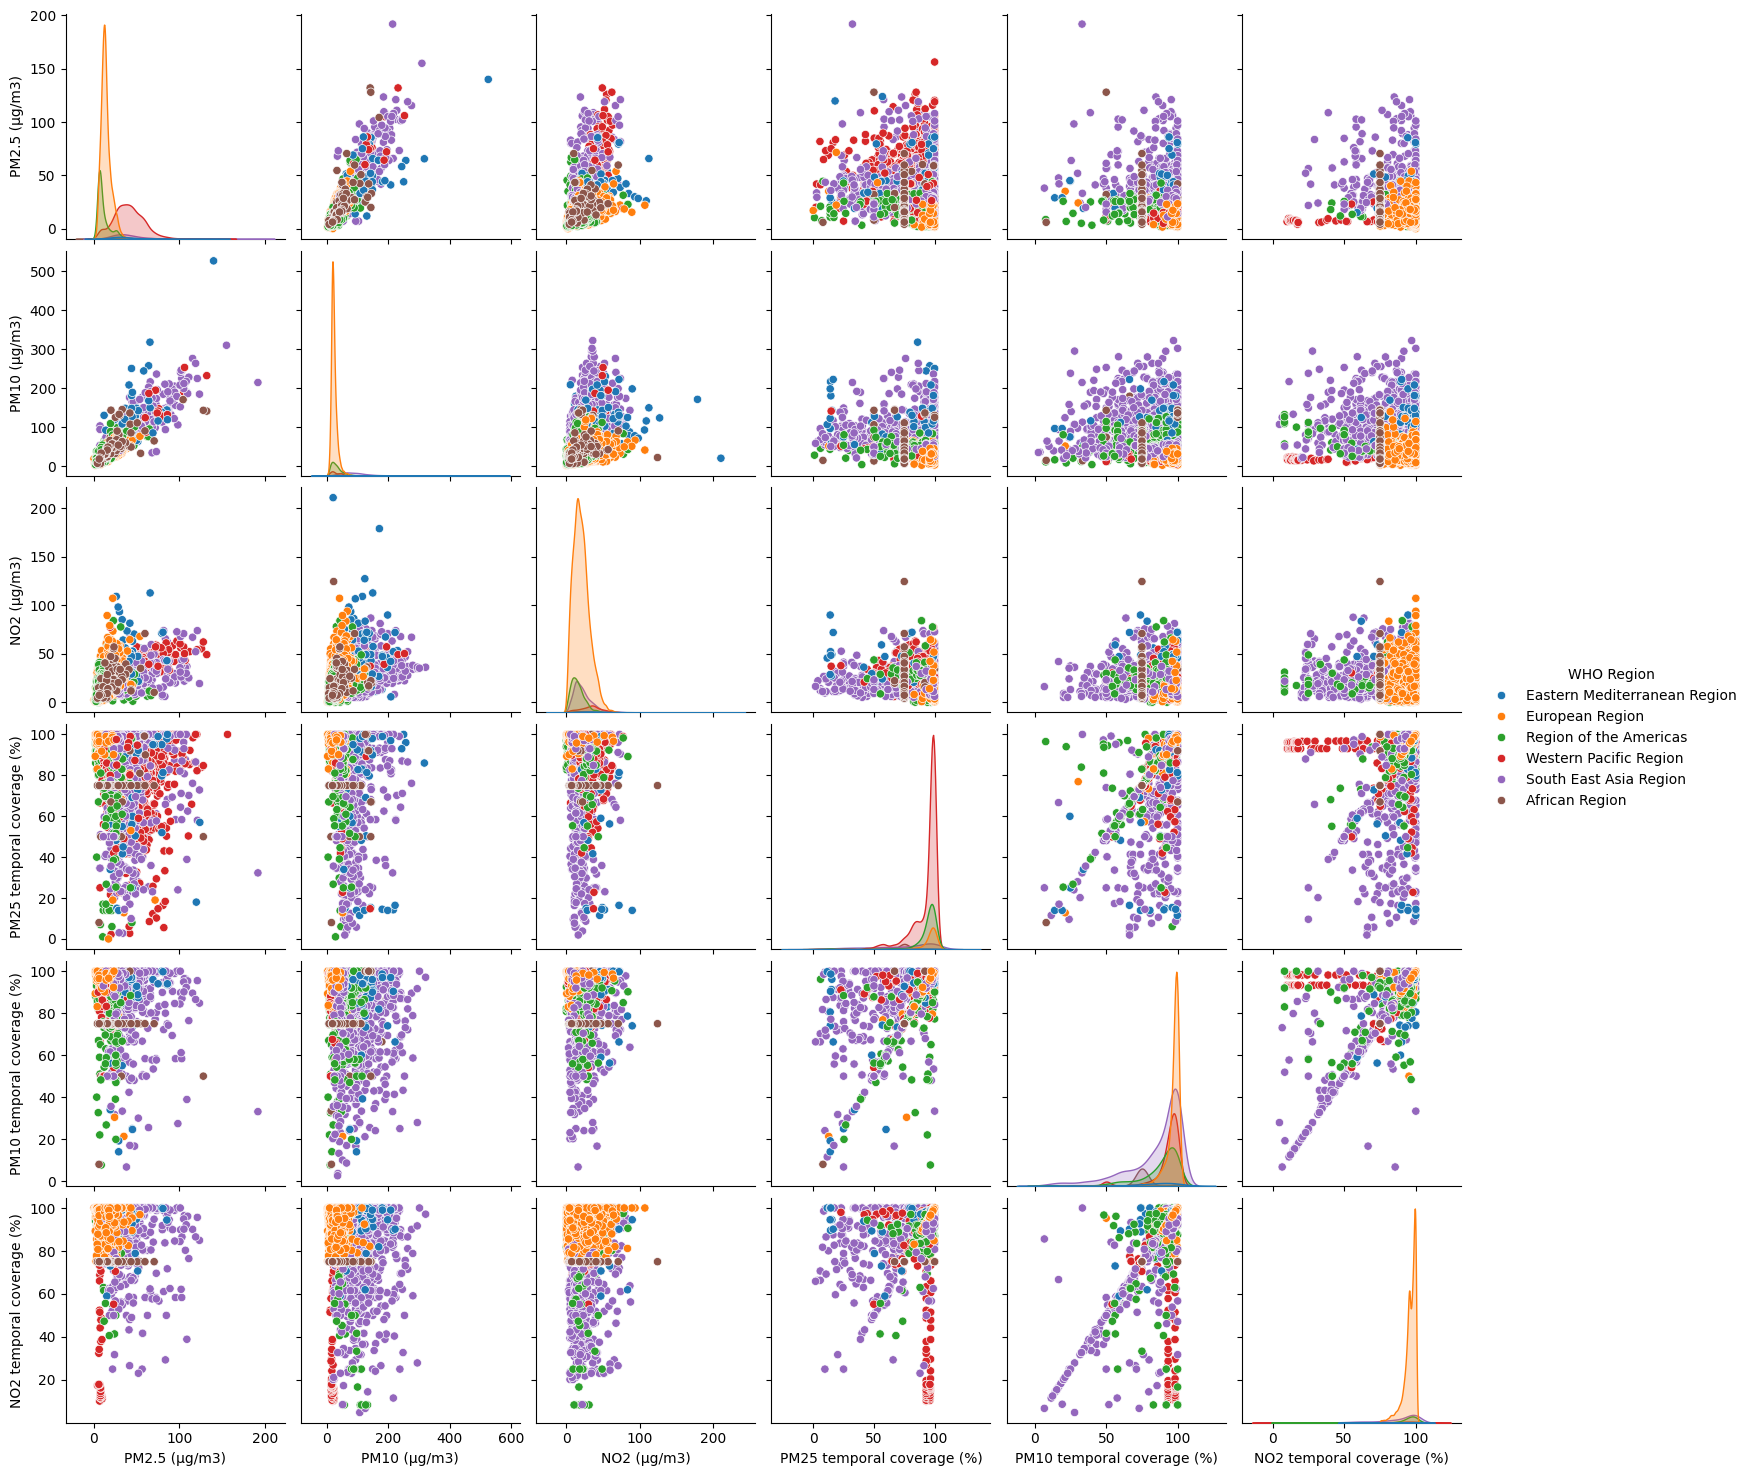

In [85]:
sns.pairplot(df[selected_columns], hue="WHO Region")
plt.show()

można dostrzec, że dla regionu europejskiego wszystkie dane są skumulowane w jednym obrębie, dla każdej pary zmiennych. Uwagę przyciąga region południowej Azji, ponieważ dla czasowego pokrycia dane układają się w linii prostej, co można uznać jako błąd pomiaru. Podobną zależność można zauważyć w zachodnim Pacyfiku. Oraz regionu afrykańskiego.

# stworzenie nowych grup względem miasta, państwa, regiony z zastosowaniem zliczenia medianowego

In [86]:
columns_of_interest = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)',
                           'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']
median_per_country = df.groupby('WHO Country Name')[columns_of_interest].median()
median_per_city = df.groupby('City or Locality')[columns_of_interest].median()
median_per_region = df.groupby('WHO Region')[columns_of_interest].median()

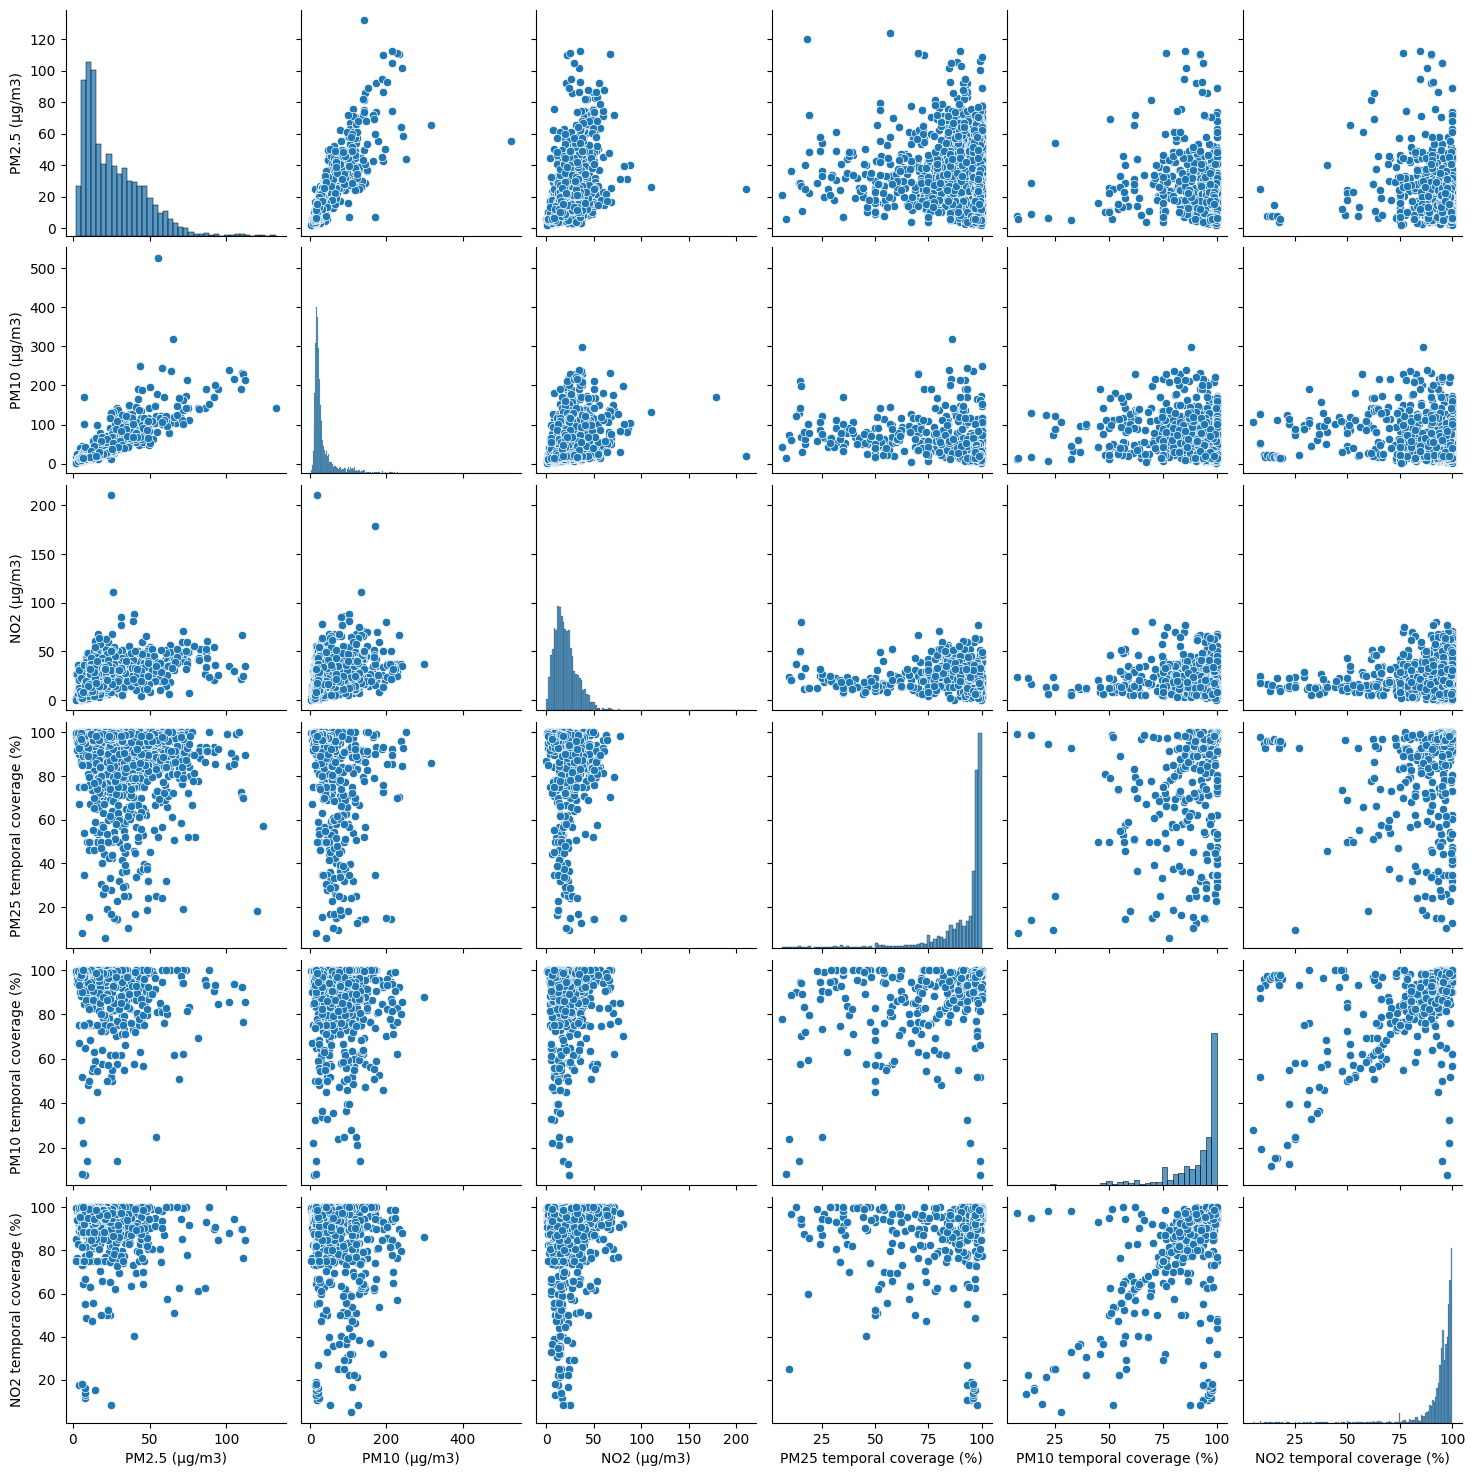

In [87]:
sns.pairplot(median_per_city)
plt.show()

Zastosowanie grupowania I przypisanie danym wartości mediany skutkowało rozciągnięciem histogramu dla stężenia NO2. Można także dostrzec że rozrzut między zmiennymi PM25 a PM10 się zmniejszył. Widać także brak zależności liniowej między zmiennymi dla pokrycia czasowego.

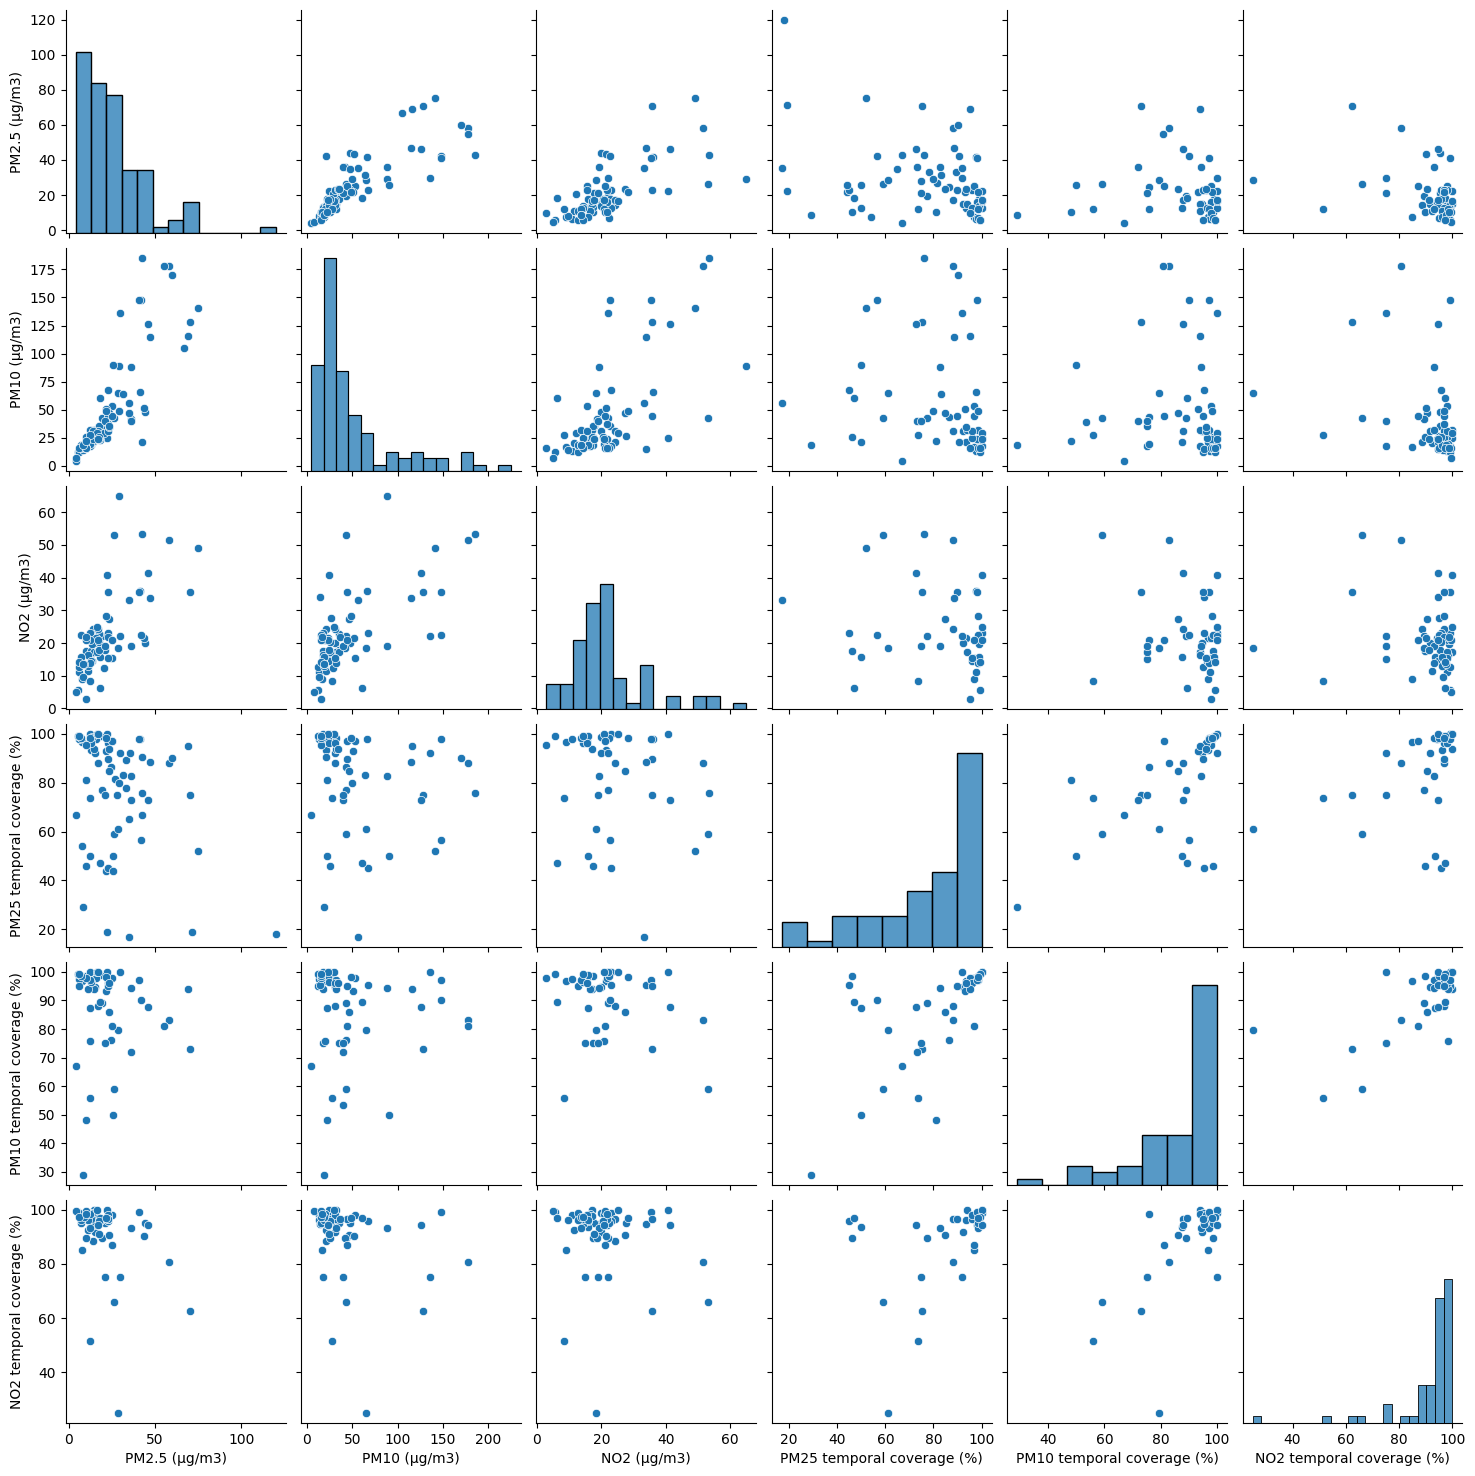

In [88]:
sns.pairplot(median_per_country)
plt.show()

Mapa dla państw różni się głownie ilościowo w stosunku do miast.

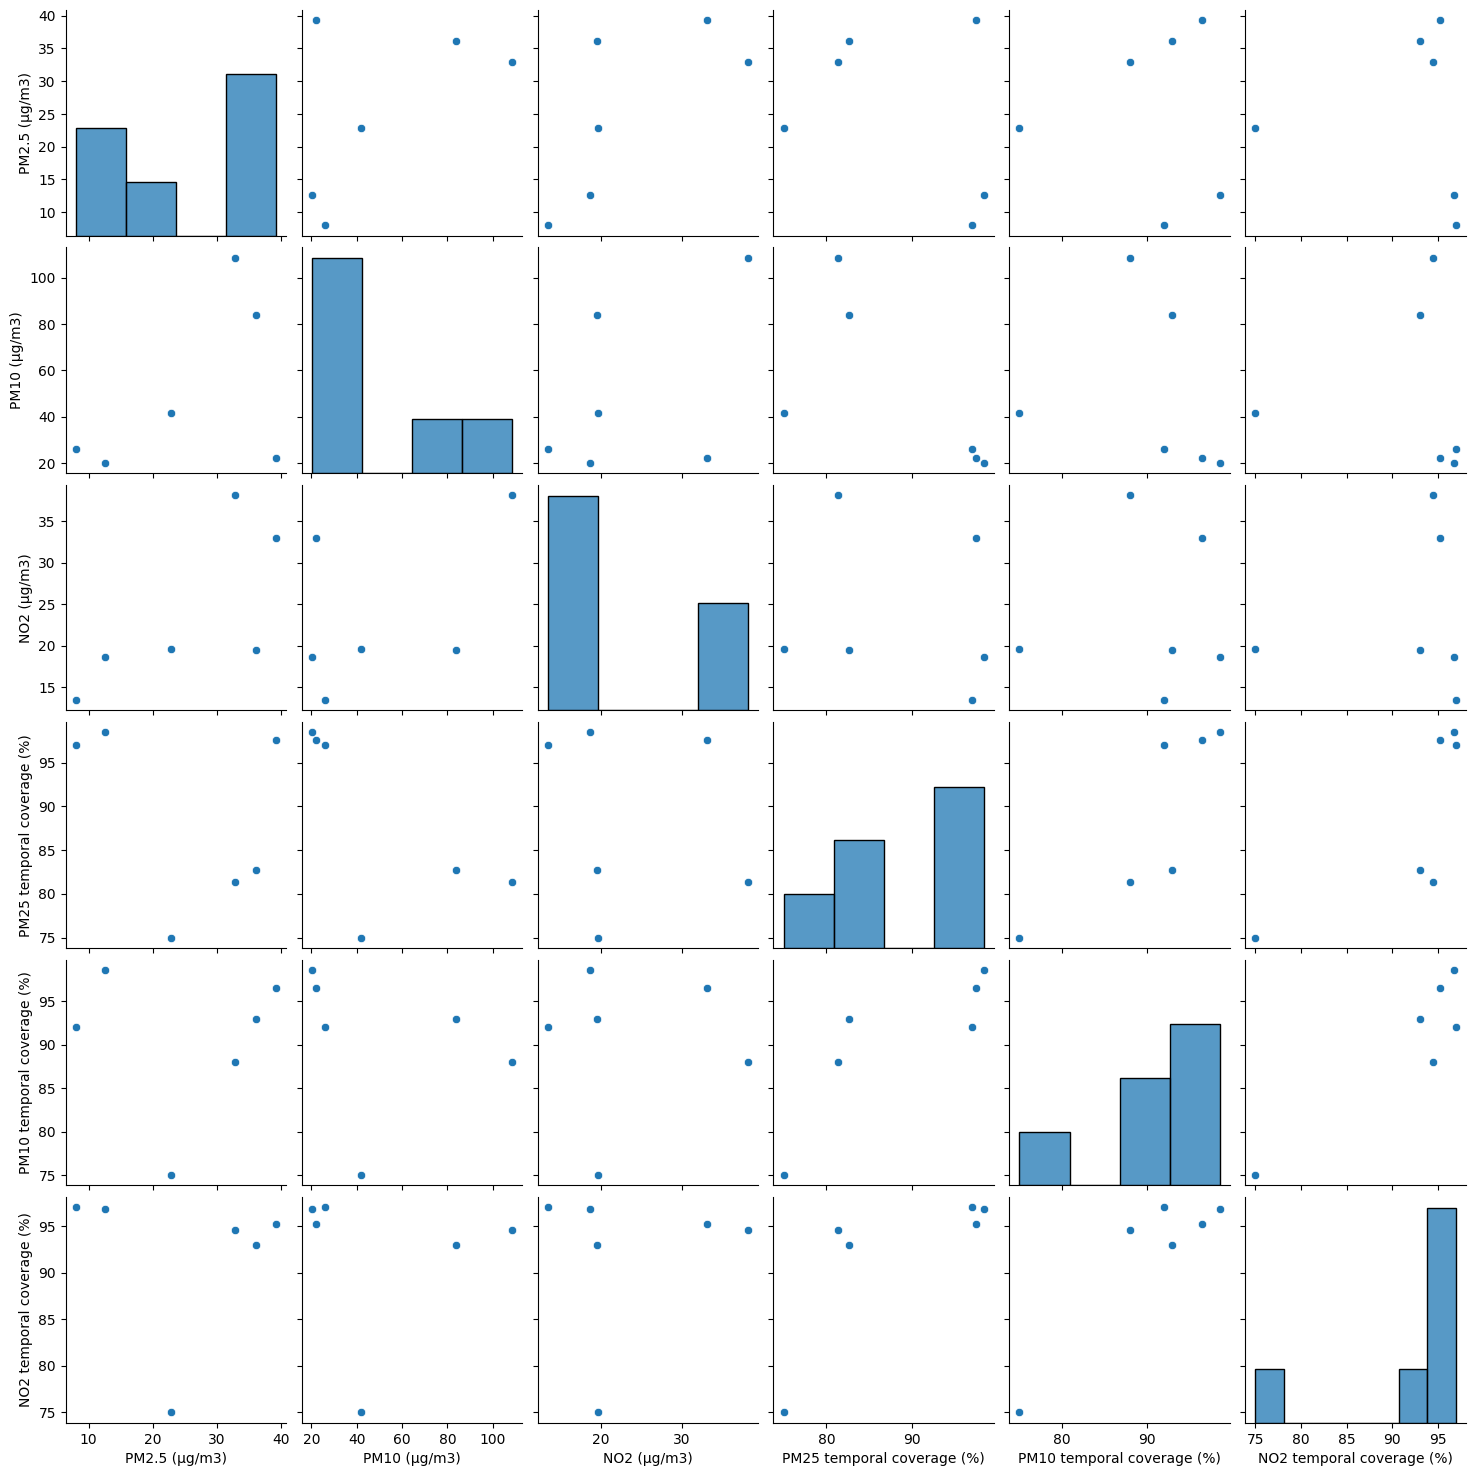

In [89]:
sns.pairplot(median_per_region)
plt.show()

Ze względu na bardzo małą ilość obserwacji dla regionów, można uznać że dane nie są istotne dla omawianego badania.

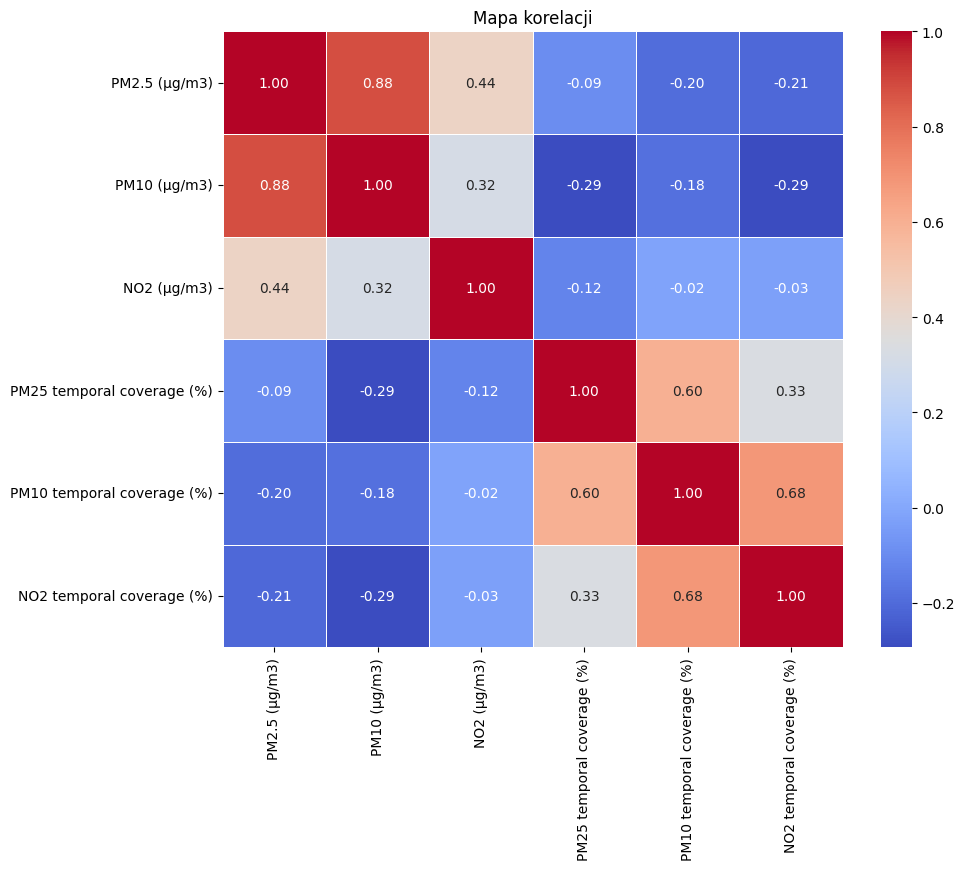

In [90]:
# Tworzenie mapy korelacji

plt.figure(figsize=(10, 8))
sns.heatmap(df[columns_of_interest].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa korelacji')
plt.show()

Heatmpa korelacji dla danych ukazuje że stężenie pyłu PM25 oraz PM10 jest silnie skorelowane. Dodatkowo widać korelacje między zmiennymi pokrycia czasowego między pyłem PM25 oraz PM10 a także PM10 i NO2. Dla pozostałych danych zachodzi niski stosunek korelacji. Ciekawą obserwacją jest fakt że mimo niskich wartości korelacji, zależność między stężeniem pyłów a pokryciem czasowym jest ujemna.

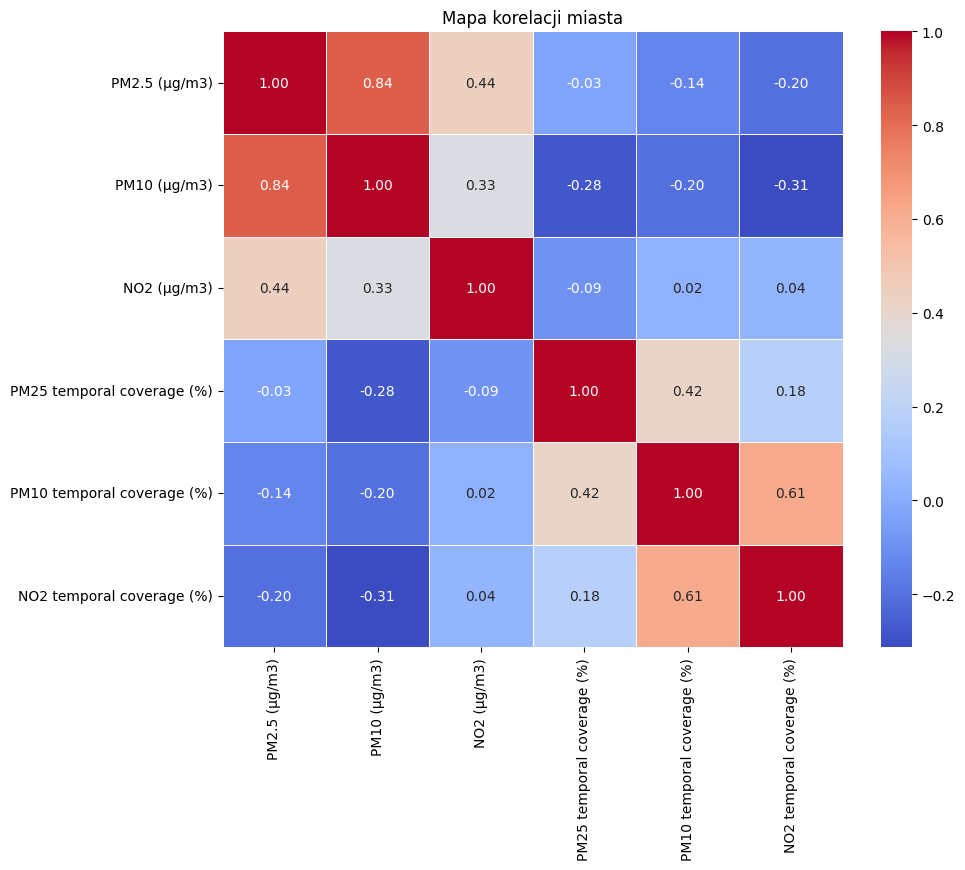

In [91]:
plt.figure(figsize=(10, 8))
sns.heatmap(median_per_city.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa korelacji miasta')
plt.show()

Dla danych zliczonych dla miast można zauważyć że istnieje głównie korelacja między stężeniem pyłu PM25 oraz PM10. Dla pozostałych zmiennych korelacja nie przekracza wartości 0.5.

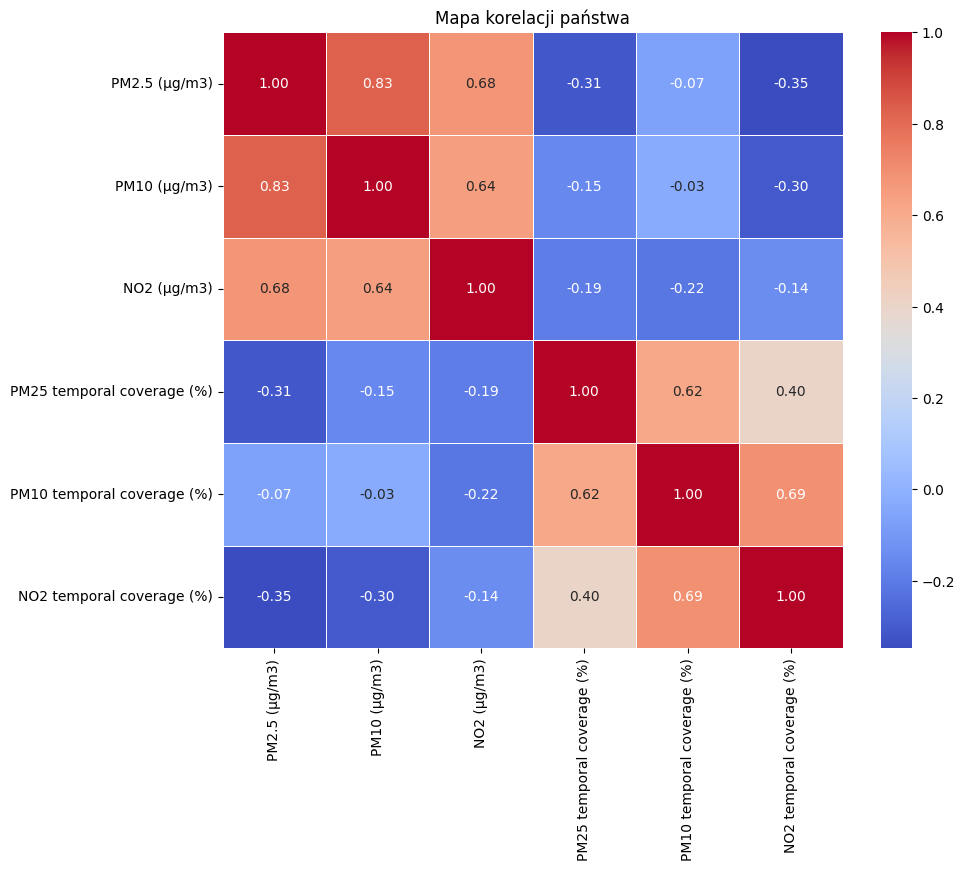

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(median_per_country.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa korelacji państwa')
plt.show()

Dla danych z krajów można zauważyć zwiększoną korelację między zmiennymi, zwłaszcza dla pomiarów stężeń gdzie wszysteie wskaźniki korelacji mają wartość większą niż 0.5. Warto zwrócić uwagę że podobną sytuacje można zaobserwować także dla pokrycia pyłami, lecz tam wartość zaczyna się od 0.4.

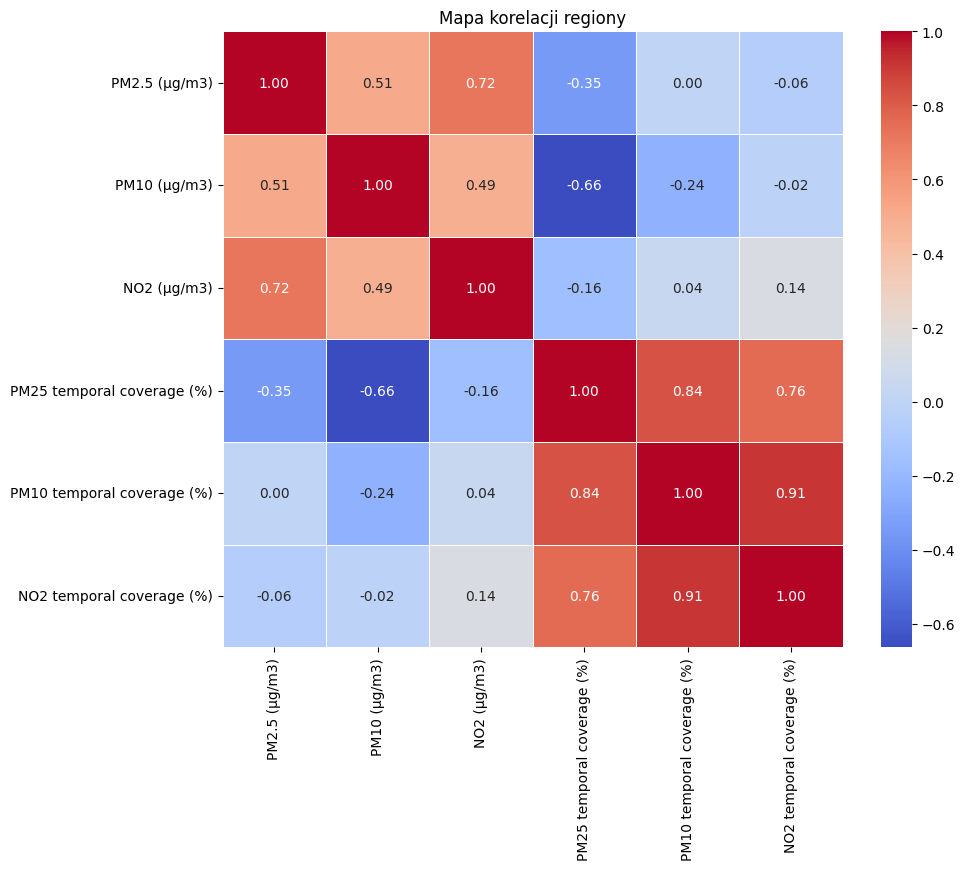

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(median_per_region.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa korelacji regiony')
plt.show()

Mapa korelacji dla regionów ukazuje podobnie jak dla państw że stężenia pyłów są ze sobą skorelowane, a także pokrycie czasowe też jest skorelowane. Warto jednak zaznaczyć że korelacja między stężeniem PM25 a PM10 wynosi zaledwie 0.52, zaś największa korelacja zachodzi między stężeniem PM25 a NO2. Narzucająca jest także wartość korelacji dla pokrycia czasowego dla wszystkich zmiennych gdyż najniższa wynosi 0.77 zaś najwyższa 0.92. Warto także zwrócić uwagę na odkrytą korelację między stężeniem pyłu PM10 z pokryciem czasowym pyłu PM 10 która wynosi -0.63. Jednakże te dane mogą być fałszywe ze względu na małą ilość regionów.

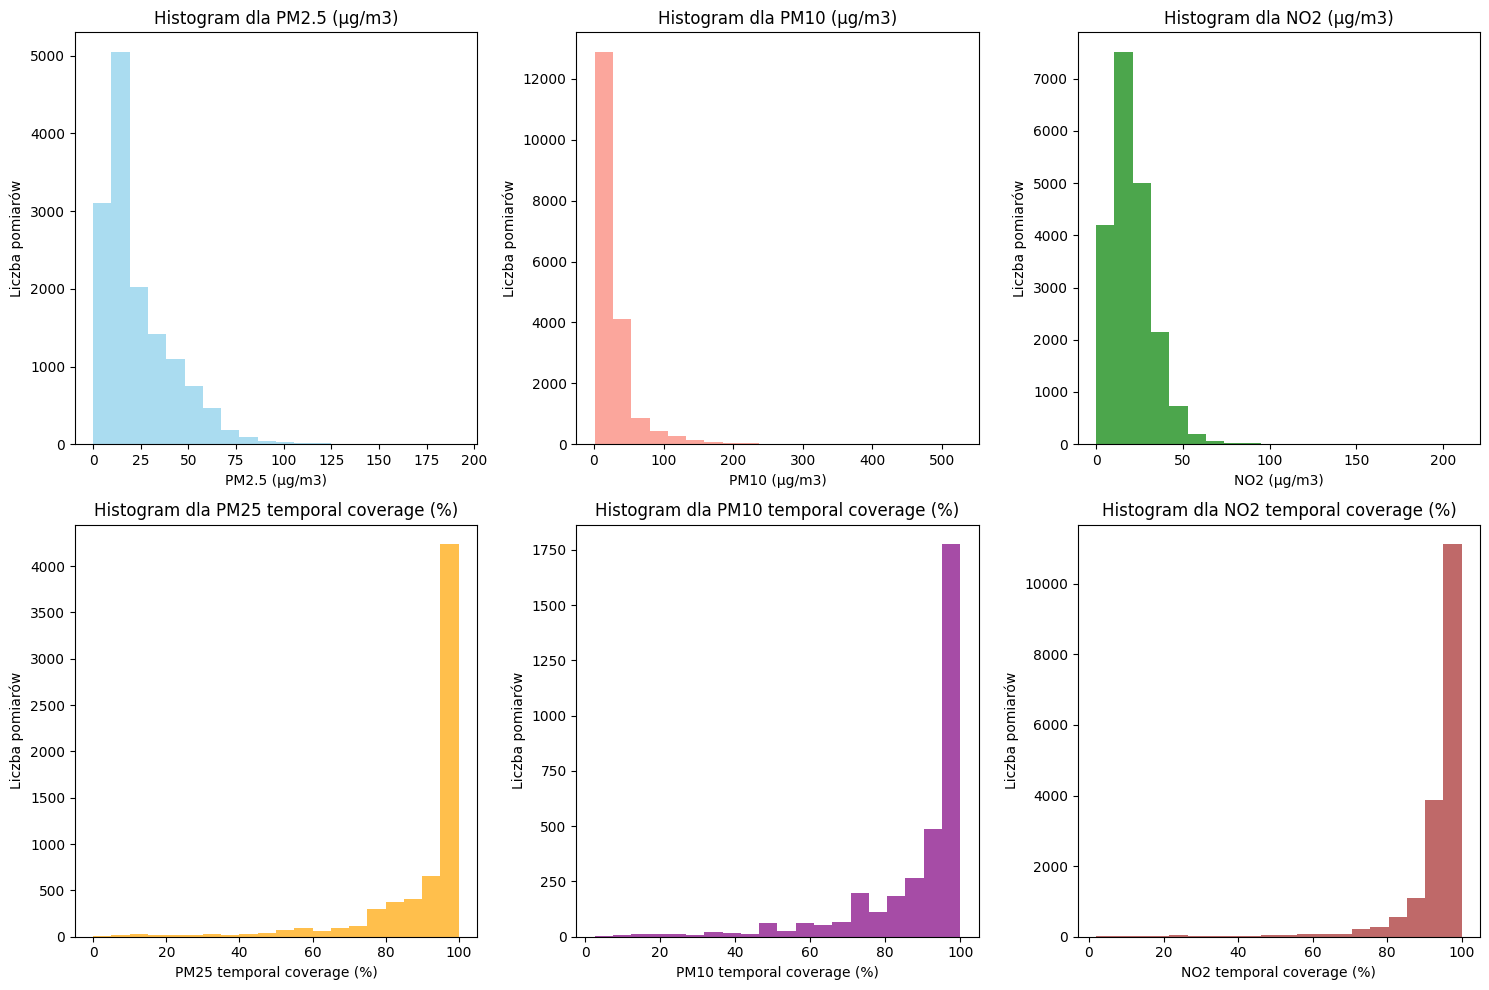

In [94]:
# Utworzenie figury i osi dla wykresów
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Wykres histogramu dla 'PM2.5 (μg/m3)'
axes[0, 0].hist(df['PM2.5 (μg/m3)'], bins=20, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Histogram dla PM2.5 (μg/m3)')
axes[0, 0].set_xlabel('PM2.5 (μg/m3)')
axes[0, 0].set_ylabel('Liczba pomiarów')

# Wykres histogramu dla 'PM10 (μg/m3)'
axes[0, 1].hist(df['PM10 (μg/m3)'], bins=20, color='salmon', alpha=0.7)
axes[0, 1].set_title('Histogram dla PM10 (μg/m3)')
axes[0, 1].set_xlabel('PM10 (μg/m3)')
axes[0, 1].set_ylabel('Liczba pomiarów')

# Wykres histogramu dla 'NO2 (μg/m3)'
axes[0, 2].hist(df['NO2 (μg/m3)'], bins=20, color='green', alpha=0.7)
axes[0, 2].set_title('Histogram dla NO2 (μg/m3)')
axes[0, 2].set_xlabel('NO2 (μg/m3)')
axes[0, 2].set_ylabel('Liczba pomiarów')

# Wykres histogramu dla 'PM25 temporal coverage (%)'
axes[1, 0].hist(df['PM25 temporal coverage (%)'], bins=20, color='orange', alpha=0.7)
axes[1, 0].set_title('Histogram dla PM25 temporal coverage (%)')
axes[1, 0].set_xlabel('PM25 temporal coverage (%)')
axes[1, 0].set_ylabel('Liczba pomiarów')

# Wykres histogramu dla 'PM10 temporal coverage (%)'
axes[1, 1].hist(df['PM10 temporal coverage (%)'], bins=20, color='purple', alpha=0.7)
axes[1, 1].set_title('Histogram dla PM10 temporal coverage (%)')
axes[1, 1].set_xlabel('PM10 temporal coverage (%)')
axes[1, 1].set_ylabel('Liczba pomiarów')

# Wykres histogramu dla 'NO2 temporal coverage (%)'
axes[1, 2].hist(df['NO2 temporal coverage (%)'], bins=20, color='brown', alpha=0.7)
axes[1, 2].set_title('Histogram dla NO2 temporal coverage (%)')
axes[1, 2].set_xlabel('NO2 temporal coverage (%)')
axes[1, 2].set_ylabel('Liczba pomiarów')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

Figura zawierająca histogramy ukazuje, że stężenie pyłów najczęściej jest bliskie zeru, jednakże występują dni kiedy stężenie jest wysokie a także bardzo wysokie. Przedstawione histogramy mają charakter skośny o bardzo szybkim spadku wraz z rosnącą wartością. Interesującą obserwacją jest czasowe pokrycie zanieczyszczeń, ponieważ jest ono lewoskośne przy maksymalnych wartościach w okolicach 100% pokrycia.
Fig.

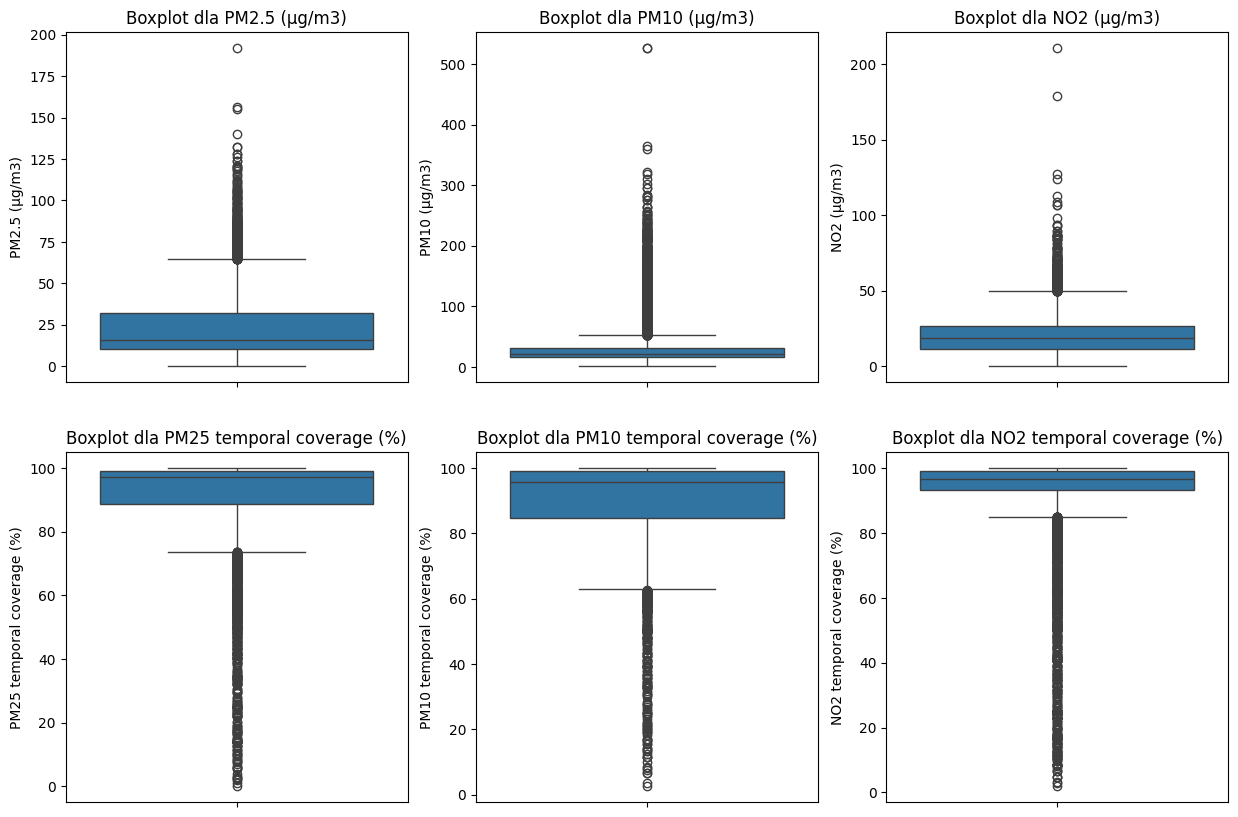

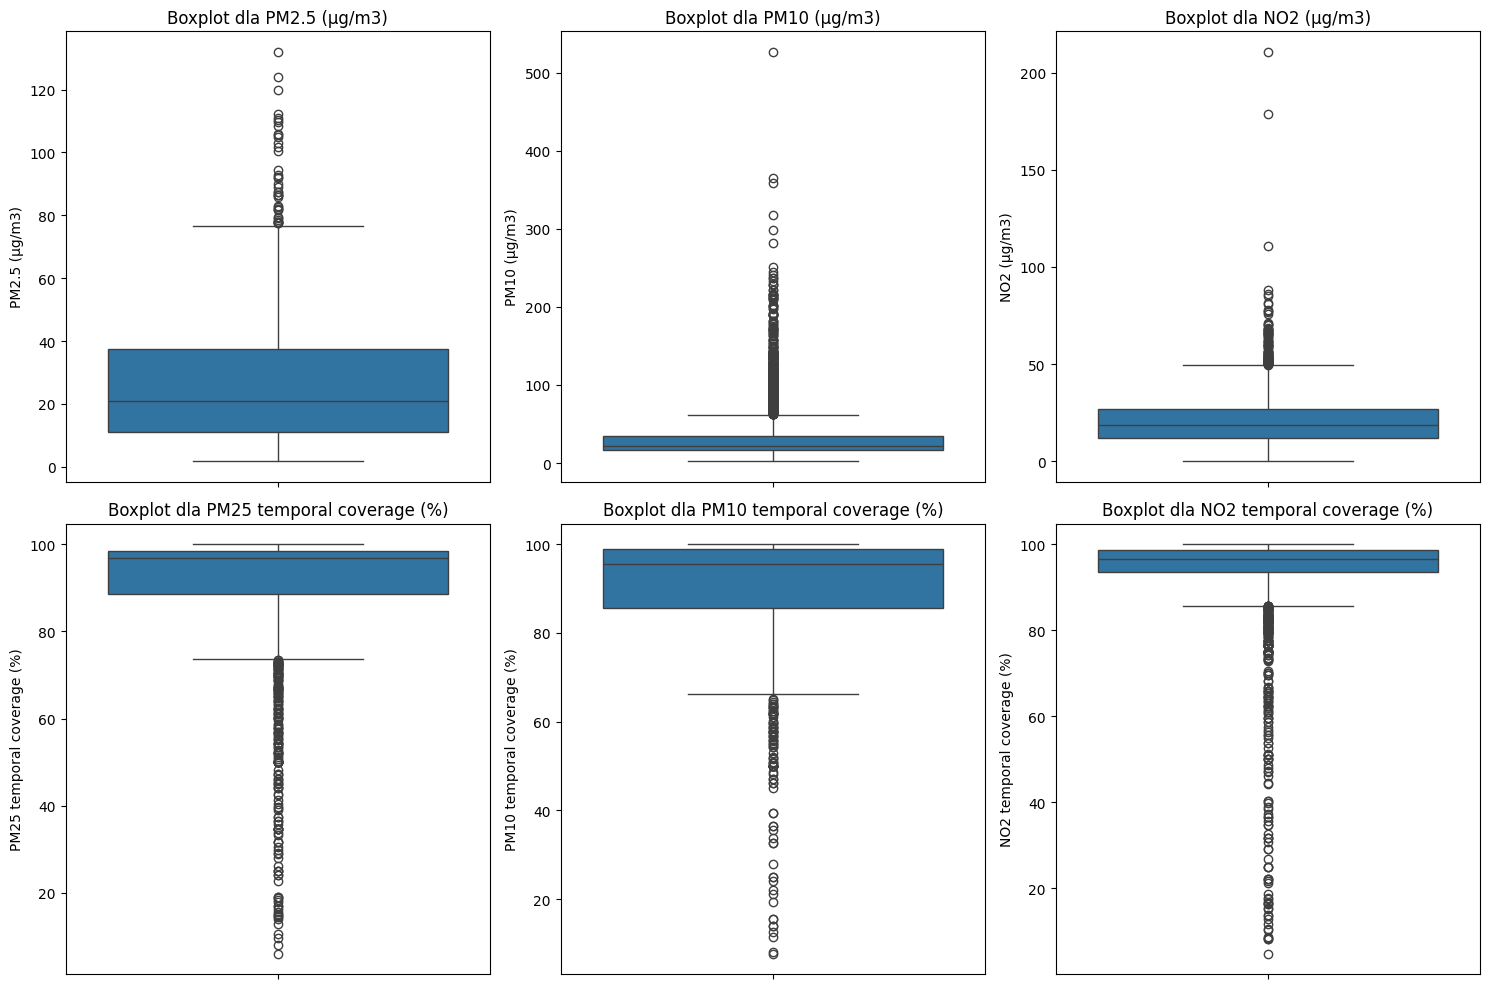

In [95]:
# Utworzenie figury i osi dla wykresów
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Wykres dla 'PM2.5 (μg/m3)'
sns.boxplot(y=df['PM2.5 (μg/m3)'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot dla PM2.5 (μg/m3)')
axes[0, 0].set_ylabel('PM2.5 (μg/m3)')

# Wykres dla 'PM10 (μg/m3)'
sns.boxplot(y=df['PM10 (μg/m3)'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot dla PM10 (μg/m3)')
axes[0, 1].set_ylabel('PM10 (μg/m3)')

# Wykres dla 'NO2 (μg/m3)'
sns.boxplot(y=df['NO2 (μg/m3)'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot dla NO2 (μg/m3)')
axes[0, 2].set_ylabel('NO2 (μg/m3)')

# Wykres dla 'PM25 temporal coverage (%)'
sns.boxplot(y=df['PM25 temporal coverage (%)'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot dla PM25 temporal coverage (%)')
axes[1, 0].set_ylabel('PM25 temporal coverage (%)')

# Wykres dla 'PM10 temporal coverage (%)'
sns.boxplot(y=df['PM10 temporal coverage (%)'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot dla PM10 temporal coverage (%)')
axes[1, 1].set_ylabel('PM10 temporal coverage (%)')

# Wykres dla 'NO2 temporal coverage (%)'
sns.boxplot(y=df['NO2 temporal coverage (%)'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot dla NO2 temporal coverage (%)')
axes[1, 2].set_ylabel('NO2 temporal coverage (%)')#

#city
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Wykres dla 'PM2.5 (μg/m3)'
sns.boxplot(y=median_per_city['PM2.5 (μg/m3)'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot dla PM2.5 (μg/m3)')
axes[0, 0].set_ylabel('PM2.5 (μg/m3)')

# Wykres dla 'PM10 (μg/m3)'
sns.boxplot(y=median_per_city['PM10 (μg/m3)'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot dla PM10 (μg/m3)')
axes[0, 1].set_ylabel('PM10 (μg/m3)')

# Wykres dla 'NO2 (μg/m3)'
sns.boxplot(y=median_per_city['NO2 (μg/m3)'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot dla NO2 (μg/m3)')
axes[0, 2].set_ylabel('NO2 (μg/m3)')

# Wykres dla 'PM25 temporal coverage (%)'
sns.boxplot(y=median_per_city['PM25 temporal coverage (%)'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot dla PM25 temporal coverage (%)')
axes[1, 0].set_ylabel('PM25 temporal coverage (%)')

# Wykres dla 'PM10 temporal coverage (%)'
sns.boxplot(y=median_per_city['PM10 temporal coverage (%)'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot dla PM10 temporal coverage (%)')
axes[1, 1].set_ylabel('PM10 temporal coverage (%)')

# Wykres dla 'NO2 temporal coverage (%)'
sns.boxplot(y=median_per_city['NO2 temporal coverage (%)'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot dla NO2 temporal coverage (%)')
axes[1, 2].set_ylabel('NO2 temporal coverage (%)')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

Figura przedstawia wykresy pudełkowe dla wszystkich danych bez grupowania. Można na nim zauważyć że stężenie wszystkich pyłów przyjmuje niskie wartości w porównaniu do jego maksymalnych wartości. Rysunki boxplot posiadają bardzo długie ogony.

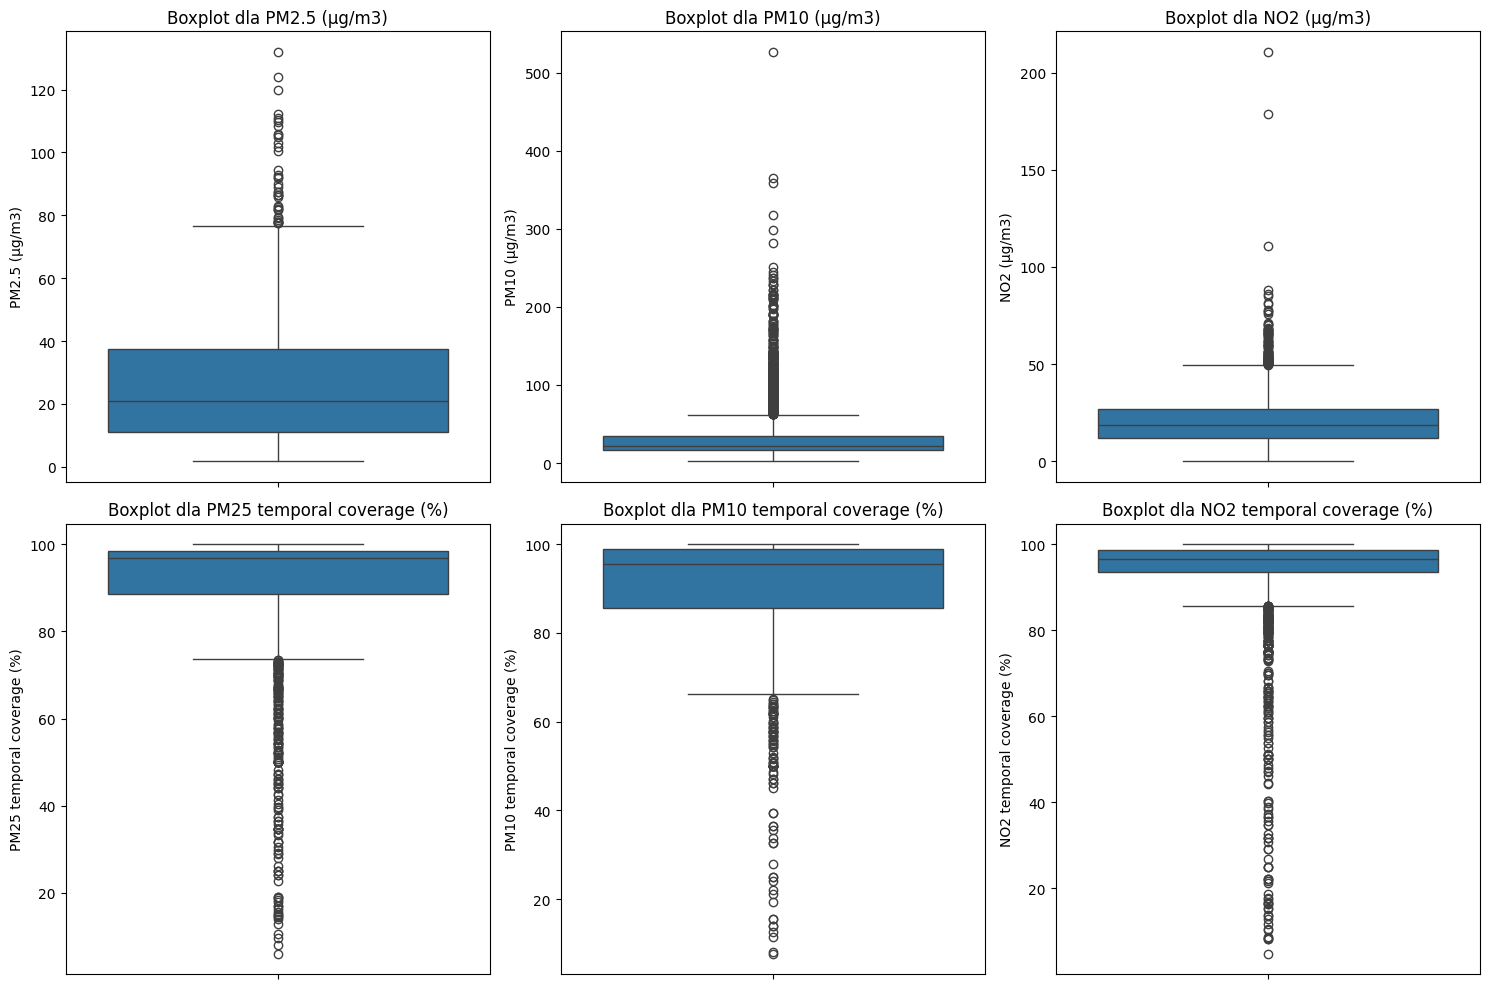

In [96]:
#city
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Wykres dla 'PM2.5 (μg/m3)'
sns.boxplot(y=median_per_city['PM2.5 (μg/m3)'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot dla PM2.5 (μg/m3)')
axes[0, 0].set_ylabel('PM2.5 (μg/m3)')

# Wykres dla 'PM10 (μg/m3)'
sns.boxplot(y=median_per_city['PM10 (μg/m3)'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot dla PM10 (μg/m3)')
axes[0, 1].set_ylabel('PM10 (μg/m3)')

# Wykres dla 'NO2 (μg/m3)'
sns.boxplot(y=median_per_city['NO2 (μg/m3)'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot dla NO2 (μg/m3)')
axes[0, 2].set_ylabel('NO2 (μg/m3)')

# Wykres dla 'PM25 temporal coverage (%)'
sns.boxplot(y=median_per_city['PM25 temporal coverage (%)'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot dla PM25 temporal coverage (%)')
axes[1, 0].set_ylabel('PM25 temporal coverage (%)')

# Wykres dla 'PM10 temporal coverage (%)'
sns.boxplot(y=median_per_city['PM10 temporal coverage (%)'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot dla PM10 temporal coverage (%)')
axes[1, 1].set_ylabel('PM10 temporal coverage (%)')

# Wykres dla 'NO2 temporal coverage (%)'
sns.boxplot(y=median_per_city['NO2 temporal coverage (%)'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot dla NO2 temporal coverage (%)')
axes[1, 2].set_ylabel('NO2 temporal coverage (%)')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

Seria wykresów pudełkowych dla miast jest bardzo zbliżona do tych z danych ogólnych. Można jednak zauważyć znaczącą różnice dla stężenia NO2 gdzie pudełko posiada większy zakres.

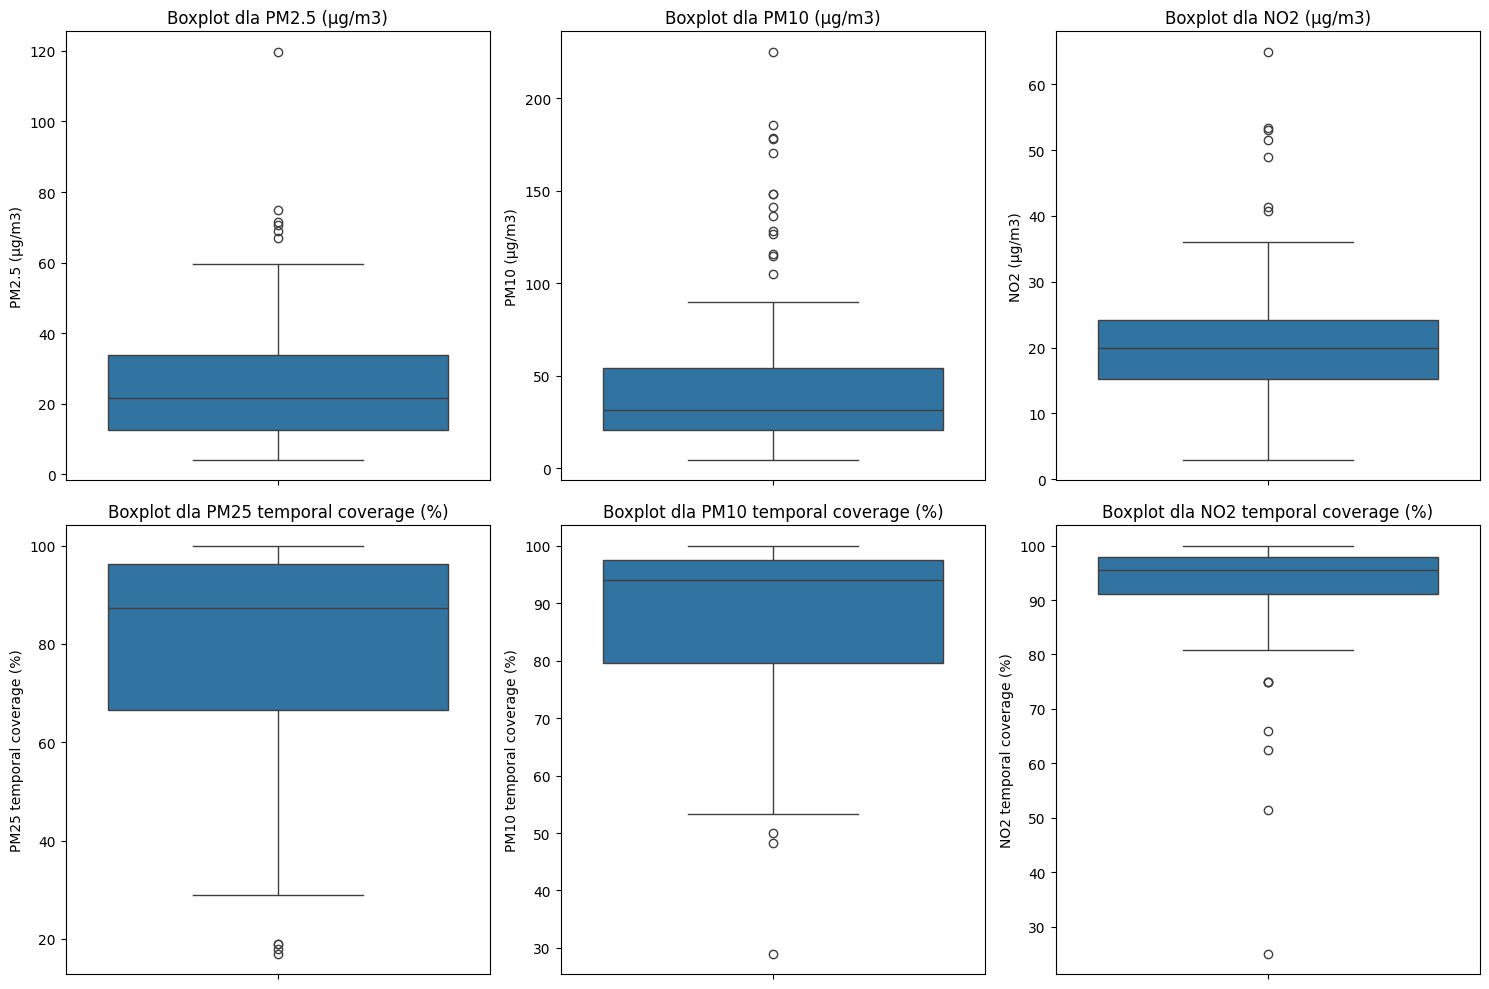

In [97]:
#country
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Wykres dla 'PM2.5 (μg/m3)'
sns.boxplot(y=median_per_country['PM2.5 (μg/m3)'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot dla PM2.5 (μg/m3)')
axes[0, 0].set_ylabel('PM2.5 (μg/m3)')

# Wykres dla 'PM10 (μg/m3)'
sns.boxplot(y=median_per_country['PM10 (μg/m3)'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot dla PM10 (μg/m3)')
axes[0, 1].set_ylabel('PM10 (μg/m3)')

# Wykres dla 'NO2 (μg/m3)'
sns.boxplot(y=median_per_country['NO2 (μg/m3)'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot dla NO2 (μg/m3)')
axes[0, 2].set_ylabel('NO2 (μg/m3)')

# Wykres dla 'PM25 temporal coverage (%)'
sns.boxplot(y=median_per_country['PM25 temporal coverage (%)'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot dla PM25 temporal coverage (%)')
axes[1, 0].set_ylabel('PM25 temporal coverage (%)')

# Wykres dla 'PM10 temporal coverage (%)'
sns.boxplot(y=median_per_country['PM10 temporal coverage (%)'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot dla PM10 temporal coverage (%)')
axes[1, 1].set_ylabel('PM10 temporal coverage (%)')

# Wykres dla 'NO2 temporal coverage (%)'
sns.boxplot(y=median_per_country['NO2 temporal coverage (%)'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot dla NO2 temporal coverage (%)')
axes[1, 2].set_ylabel('NO2 temporal coverage (%)')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

Dla danych zgrupowanych w państwa można dostrzec że pudełko oraz wąsy mają bardzo zbliżony zakres do tych z miast, zaś jest znacznie miej wartości odstających, jest to związane w związku z zastosowaniem obliczania mediany dla danych zgrupowanych.

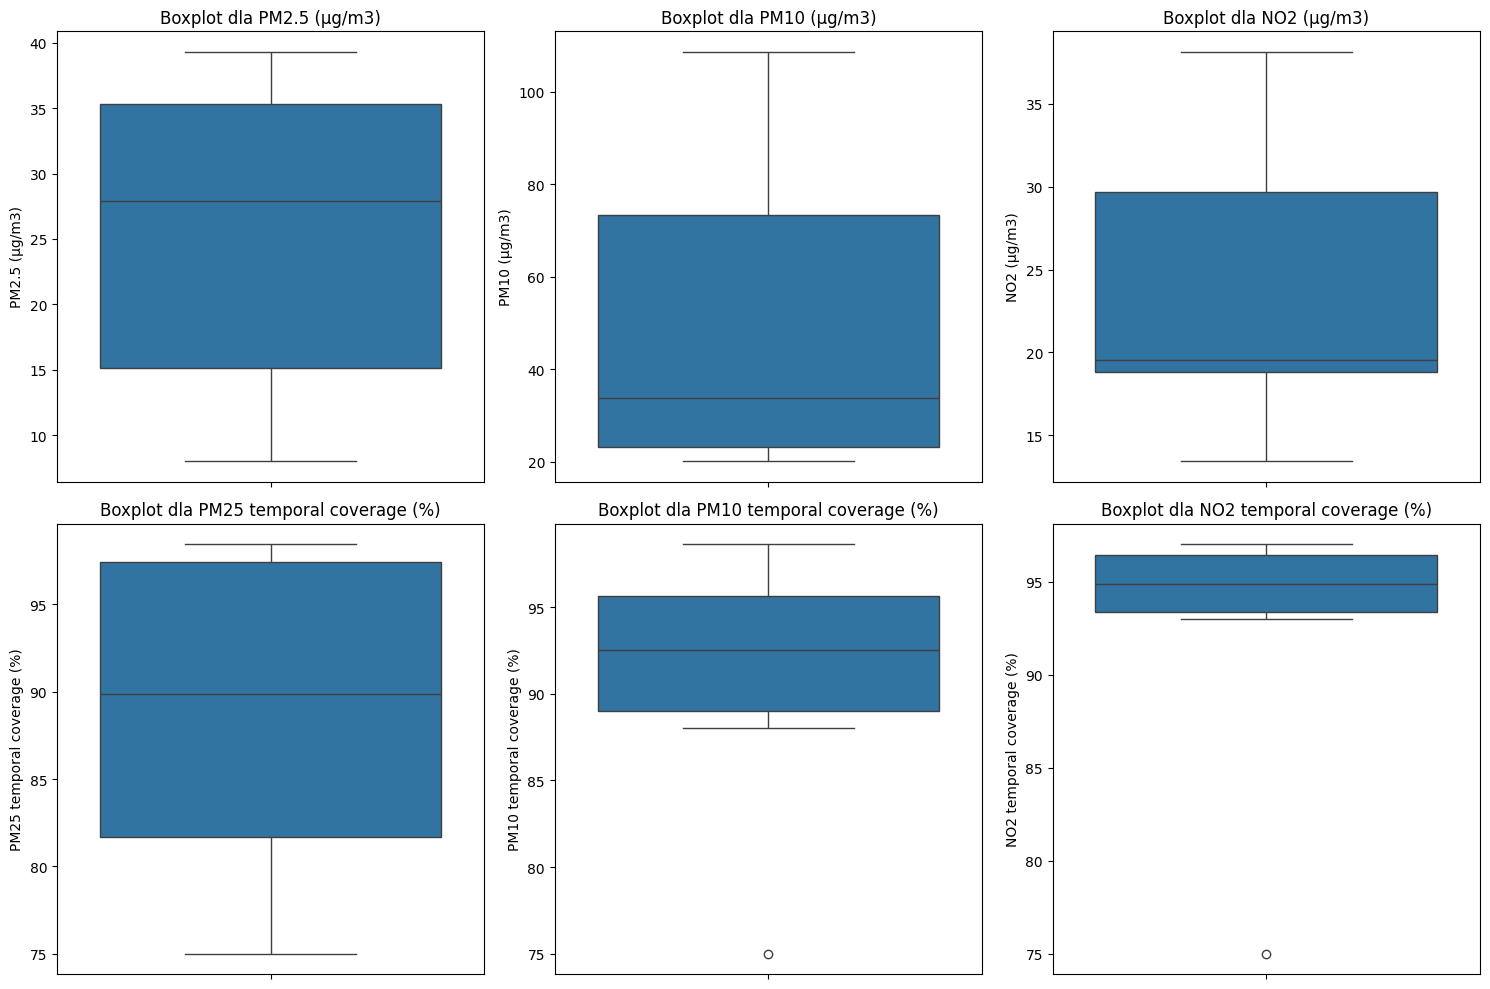

In [98]:
#region
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Wykres dla 'PM2.5 (μg/m3)'
sns.boxplot(y=median_per_region['PM2.5 (μg/m3)'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot dla PM2.5 (μg/m3)')
axes[0, 0].set_ylabel('PM2.5 (μg/m3)')

# Wykres dla 'PM10 (μg/m3)'
sns.boxplot(y=median_per_region['PM10 (μg/m3)'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot dla PM10 (μg/m3)')
axes[0, 1].set_ylabel('PM10 (μg/m3)')

# Wykres dla 'NO2 (μg/m3)'
sns.boxplot(y=median_per_region['NO2 (μg/m3)'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot dla NO2 (μg/m3)')
axes[0, 2].set_ylabel('NO2 (μg/m3)')

# Wykres dla 'PM25 temporal coverage (%)'
sns.boxplot(y=median_per_region['PM25 temporal coverage (%)'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot dla PM25 temporal coverage (%)')
axes[1, 0].set_ylabel('PM25 temporal coverage (%)')

# Wykres dla 'PM10 temporal coverage (%)'
sns.boxplot(y=median_per_region['PM10 temporal coverage (%)'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot dla PM10 temporal coverage (%)')
axes[1, 1].set_ylabel('PM10 temporal coverage (%)')

# Wykres dla 'NO2 temporal coverage (%)'
sns.boxplot(y=median_per_region['NO2 temporal coverage (%)'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot dla NO2 temporal coverage (%)')
axes[1, 2].set_ylabel('NO2 temporal coverage (%)')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

Wykresy pudełkowe umieszczone w figurze 4 jeszcze bardziej uwydatniają zastosowanie grupowania przy zastosowaniu mediany dla danych.

C:\Users\szymo\AppData\Local\Temp\ipykernel_1668\681015418.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


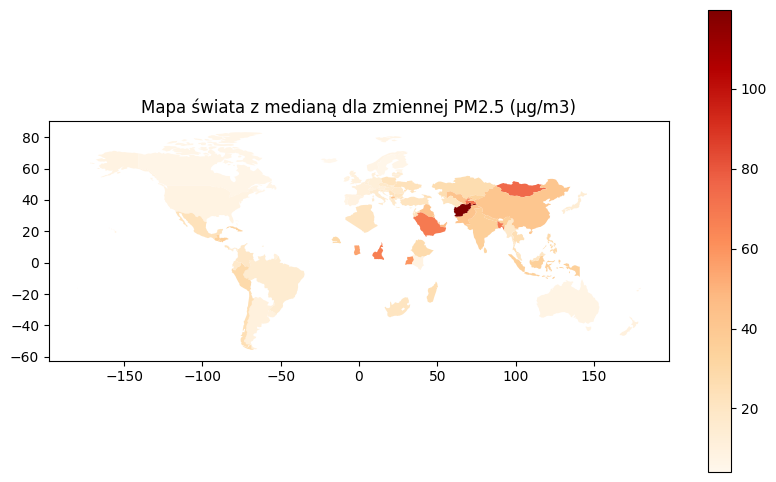

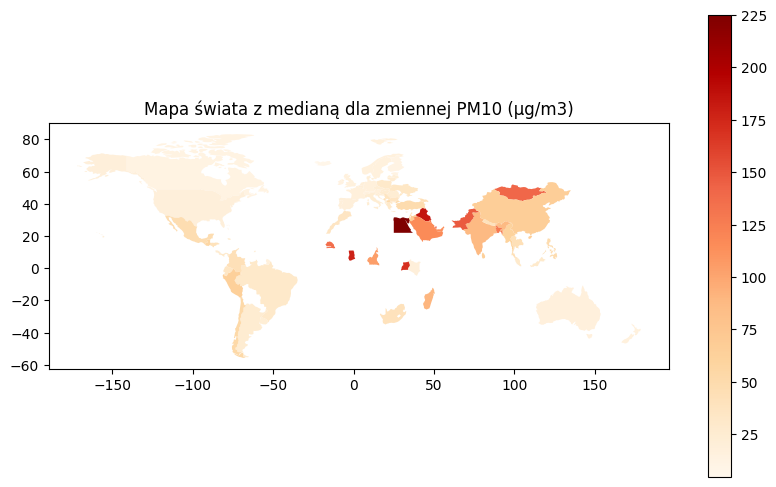

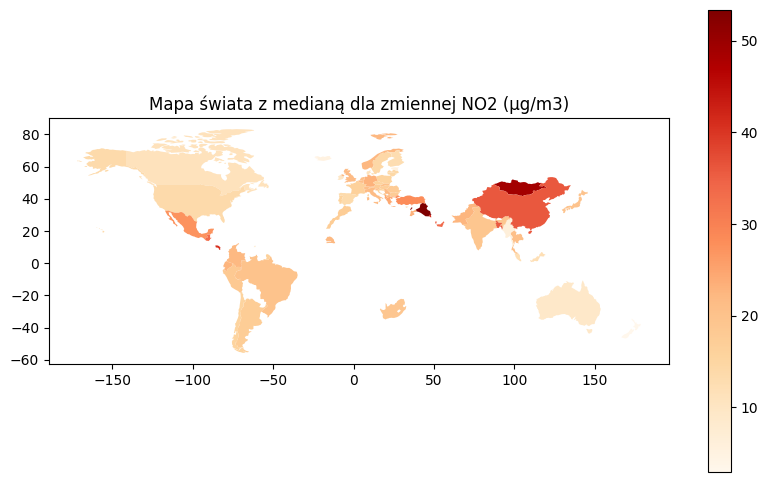

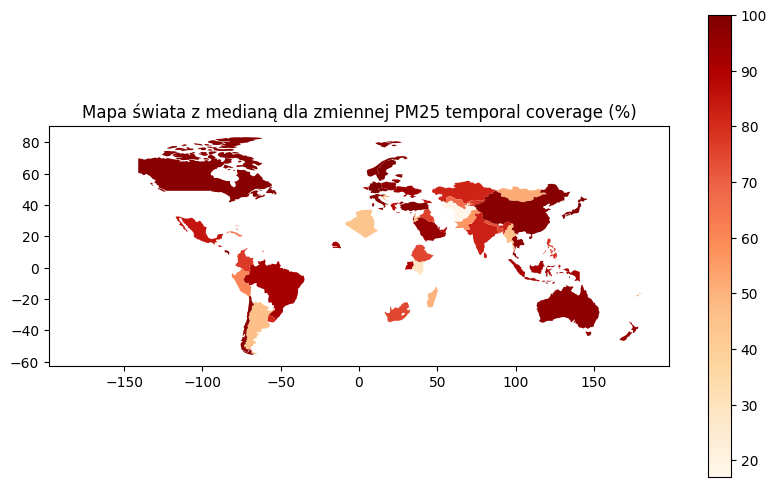

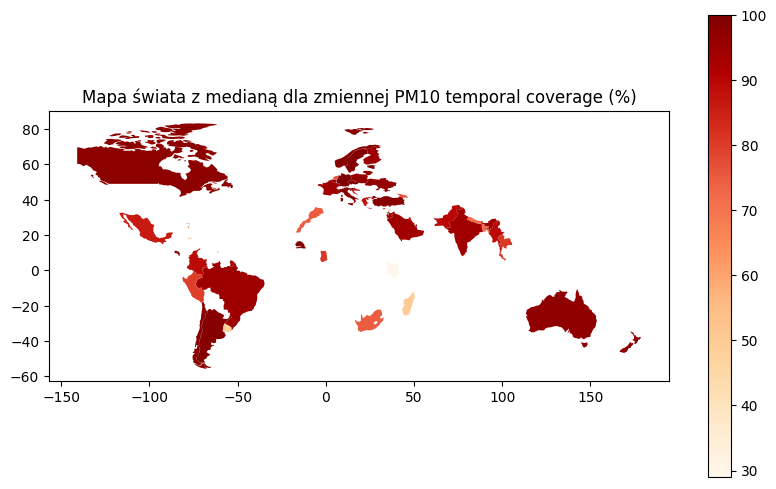

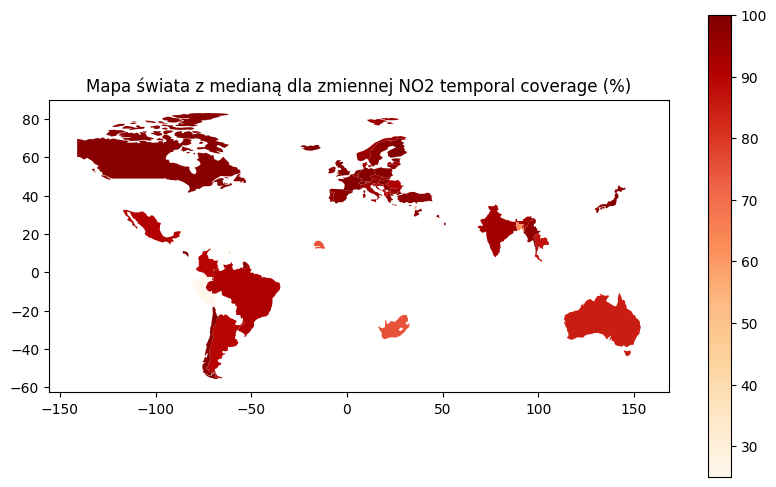

<Figure size 640x480 with 0 Axes>

In [99]:
numeric_columns = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Wczytanie mapy świata
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Połączenie danych geograficznych z medianami
merged_data = world.merge(median_per_country, how='left', left_on='name', right_index=True)

# Rysowanie mapy dla każdej zmiennej
variables = ['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'PM25 temporal coverage (%)',
                     'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)']

for variable in variables:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    merged_data.plot(column=variable, cmap='OrRd', legend=True, ax=ax)

    # Dodanie tytułu
    plt.title(f'Mapa świata z medianą dla zmiennej {variable}')
    plt.show()





# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


Mapa z naniesioną medialną wartością zanieczyszczeń PM25 ukazuje że największe zanieczyszczenia występują w Nepalu oraz Indiach wśród dostępnych danych. Warto zauważyć że jedno z większych zanieczyszczeń dala Europy znajduje się w Polsce.
Zgodnie z mapą stężenia pyłu pm10, widać duże podobieństwo w ilości zanieczyszczeń PM25 i PM 10. Jednak narzucającą się kwestią jest zanieczyszczenie w Senegalu, które jest największe w badanym okresie.
Mapa dla zanieczyszczenia NO2 przedstawia że to zanieczyszczenie występuję równomiernie w badanych krajach.
Wykres pokrycia czasowego dla PM25 ukazuje że badane kraje w znaczym stopniu są pokryte pyłem zawieszonym w badanym okresie. Wyjątek stanowi terytorium Argentyny oraz Nepalu które pokryte jest w bardzo małym stopniu.
Wykres pokrycia czasowego dla pyłu zawieszonego NO2 w znacznym stopniu przypomina ten dla PM25, widzimy tutaj że kraje o anomalnie niskim okresowym pokryciu pyłem PM25, dla badanego pyłu bardzo dobrze się odróżniają.
Można dostrzec że dla NO2 okresowe pokrycie w badanym czasie było bardzo wysokie, anomalną wartością odznacza się jednak Peru z bardzo niskimi wartościami.

# Wnioski

Baza danych zanieczyszczenia powietrza ma wiele braków, które mogą być spowodowane okresem badawczym który zaczyna się w 2010 roku kiedy temat zanieczyszczenia powietrza nie był jeszcze tak rozpowszechniony jak obecnie. Ponadto wiele państw dopiero wprowadza urządzenia pomiaru zanieczyszczeń co można zauważyć w histogramie gdzie najwięcej pomiarów jest dla krajów europejskich.
Analizując dane można stwierdzić że niektóre regiony posiadają błędy pomiarowe, jak na przykład region Afrykański, zachodniego Pacyfiku oraz południowo wschodniej Azji. W ich przypadku należy usunąć dane które wprowadzają w błąd.
W przedstawionej analizie dostrzegalny jest związek pomiędzy stężeniem pyłu zawieszonego PM 25 i PM10. Jest to spowodowane tym samym czynnikiem wprowadzającym te zanieczyszczenia do środowiska.
Dostrzegalna jest także różnica w badanych regionach, region Europy oraz ameryki posiada bardziej skoncentrowane obserwacje o niższych wskazaniach niż pozostałe. Może mieć to związek z polityką klimatyczną które są bardziej rozpowszechnione w tych regionach, a także z większą świadomością obywateli.
Omówiony